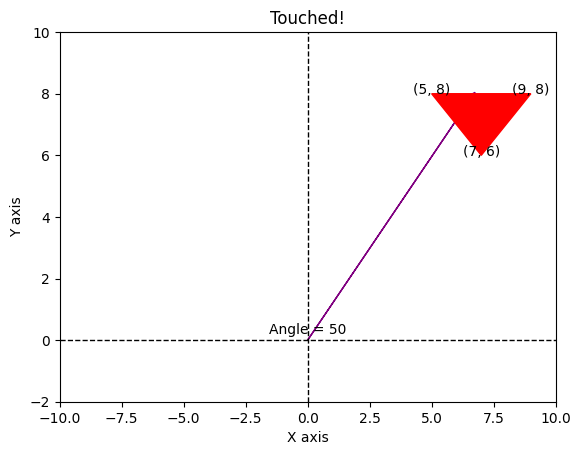

In [1]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

#Set angle
# angle  = math.radians(random.randint(0, 180))
angle = 50

# Parameter vector of laser pointer
l = [math.tan(math.radians(angle)), -1, 0]

#Set vertices
v_1 = (5, 8)
v_2 = (9, 8)
v_3 = (7, 6)

triangle = [[v_1[0], v_1[1], 1], [v_2[0], v_2[1], 1], [v_3[0], v_3[1], 1]]
status = "Missed!"

for i in range(3):
    j = (i + 1)%3
    #Calculate line-segment between 2 vertices of the triangle
    ls_1 = np.cross(triangle[i], triangle[j])
    
    #Calculate intersection point between laser pointer and line-segment
    p_1 = np.cross(l, ls_1)
    
    #Get the intersection point in the 2D physical plain
    p_1_2D = [p_1[0]/p_1[2], p_1[1]/p_1[2]]
    
    #Check if the intersection point is in between the two vertices of the triangle
    if min(triangle[i][0], triangle[j][0])<= p_1_2D[0] <= max(triangle[i][0], triangle[j][0]) and min(triangle[i][1], triangle[j][1])<= p_1_2D[1] <= max(triangle[i][1], triangle[j][1]):
        status = "Touched!"
    
# Create a figure and axis
fig, ax = plt.subplots()

# Draw the X and Y axes
ax.axhline(0, color='black', linewidth=1, linestyle='--')  # X axis
ax.axvline(0, color='black', linewidth=1, linestyle='--')  # Y axis

# Draw the laser pointer line (at 45 degrees)
length = 10  # length of the laser pointer
x_end = length * np.cos(np.radians(angle))
y_end = length * np.sin(np.radians(angle))
ax.arrow(0, 0, x_end, y_end, head_width=0.5, head_length=0.5, fc='purple', ec='purple')

# Draw the enemy triangle
triangle = plt.Polygon([v_1, v_2, v_3], color='red')
ax.text(v_1[0], v_1[1], f'{v_1}', fontsize=10, color='black', ha='center')
ax.text(v_2[0], v_2[1], f'{v_2}', fontsize=10, color='black', ha='center')
ax.text(v_3[0], v_3[1], f'{v_3}', fontsize=10, color='black', ha='center')
ax.add_patch(triangle)

# Label angle
ax.text(0, 0.2, f'Angle = {angle}', fontsize=10, color='black', ha='center')

# Set the limits and labels
ax.set_xlim(-10, 10)
ax.set_ylim(-2, 10)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_title(f'{status}')

# Show the plot
plt.show()
